# USER_TAKEHOME

### Load libraries and data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/Users/rohanshah_95/Desktop/Fetch/USER_TAKEHOME.csv')

### Explore data

In [3]:
# View first 5 rows of data
data.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
# Check (rows,columns) of data
data.shape

(100000, 6)

In [5]:
# Check data types of each column
data.dtypes

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

### Check for NULL values in data

In [6]:
# Replace empty (NaN) cells with 'NULL'
data = data.fillna('NULL')

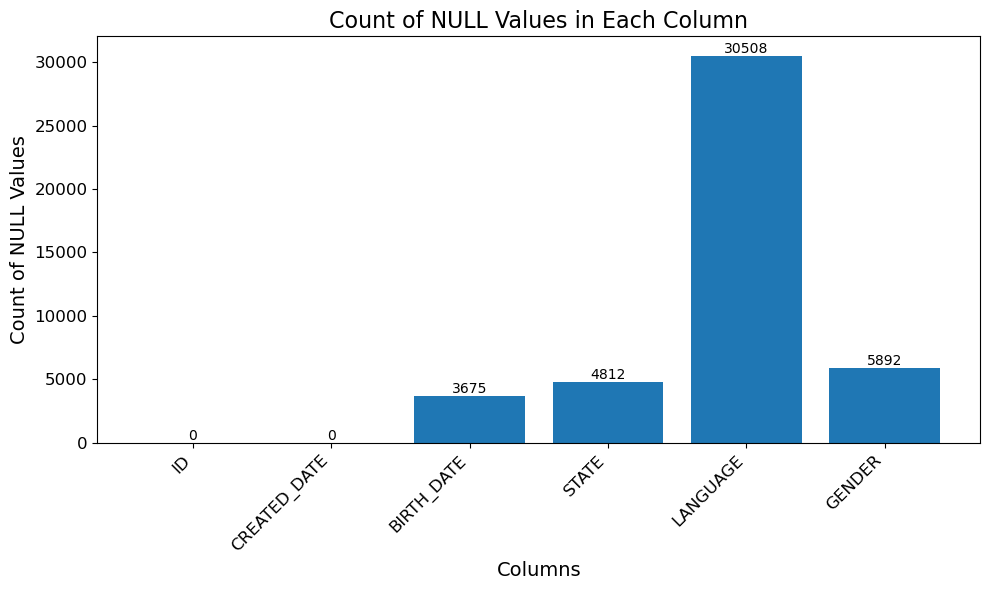

In [7]:
# Count the number of 'NULL' values in each column
null_counts = (data == 'NULL').sum()

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(null_counts.index, null_counts.values)
plt.title('Count of NULL Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of NULL Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Print the chart
plt.tight_layout()
plt.show()

### Check data distribution

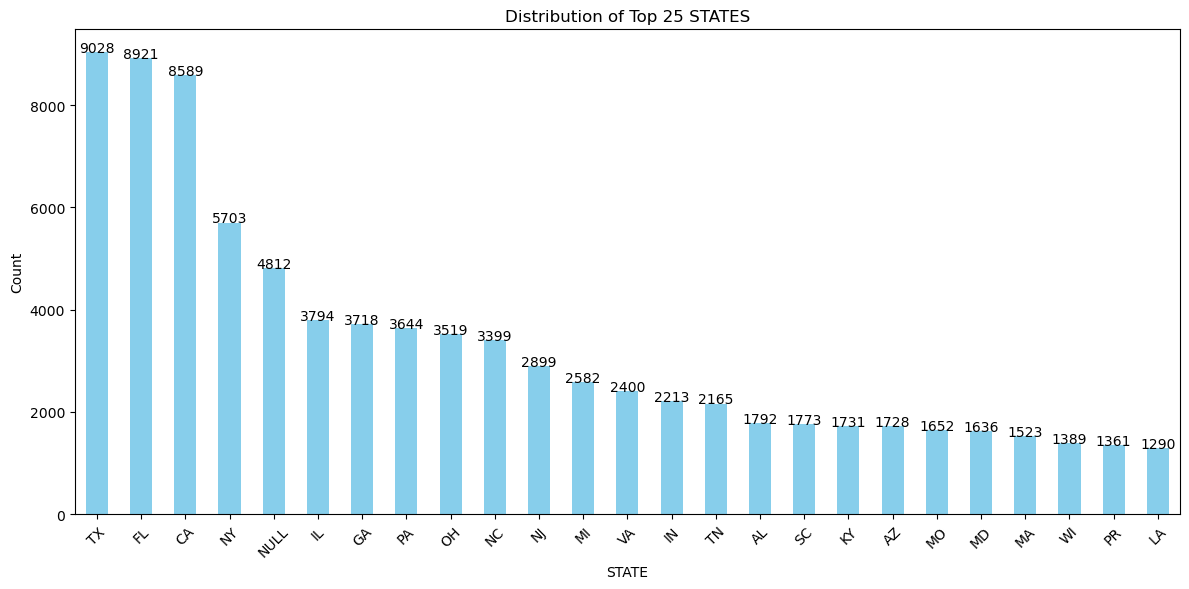

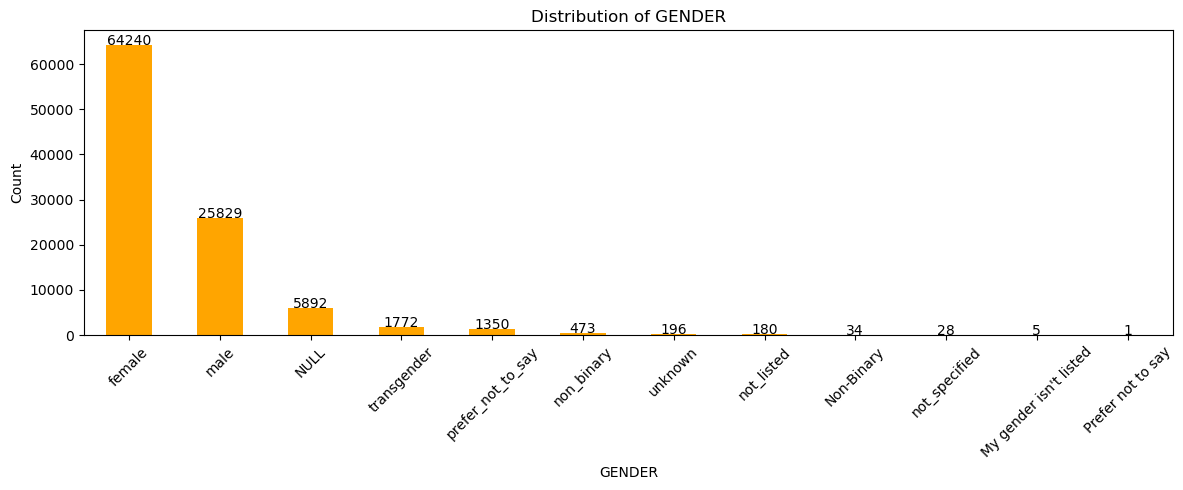

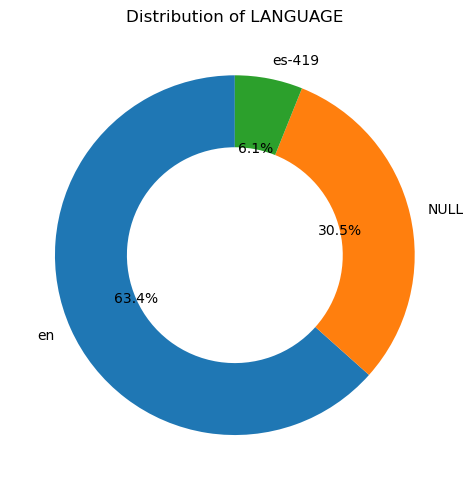

In [8]:
# Calculate the data distribution
state_distribution = data['STATE'].value_counts()
language_distribution = data['LANGUAGE'].value_counts()
gender_distribution = data['GENDER'].value_counts()

# Bar chart for STATE distribution

# Limit the state distribution to the top 25 states
top_25_states = state_distribution.head(25)

# Bar chart for the top 25 STATES
plt.figure(figsize=(12, 6))
top_25_states.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 25 STATES')
plt.xlabel('STATE')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(top_25_states):
    plt.text(index, value + 1, str(value), ha='center')
plt.tight_layout()
plt.show()

# Bar chart for GENDER distribution
plt.figure(figsize=(12, 5))
gender_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of GENDER')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(gender_distribution):
    plt.text(index, value + 1, str(value), ha='center')
plt.tight_layout()
plt.show()

# Donut chart for LANGUAGE distribution
plt.figure(figsize=(5, 5))
plt.pie(language_distribution, labels=language_distribution.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Distribution of LANGUAGE')
plt.tight_layout()
plt.show()

### Change data types

In [9]:
# Change data types to appropriate types
data['ID'] = data['ID'].astype(str)
data['CREATED_DATE'] = pd.to_datetime(data['CREATED_DATE'], errors='coerce').dt.strftime('%m/%d/%Y')
data['BIRTH_DATE'] = pd.to_datetime(data['BIRTH_DATE'], errors='coerce').dt.strftime('%m/%d/%Y')
data['STATE'] = data['STATE'].astype(str)
data['LANGUAGE'] = data['LANGUAGE'].astype(str)
data['GENDER'] = data['GENDER'].astype(str)

### Check for placeholder/default data

In [10]:
# Check for placeholder dates in BIRTH_DATE column
placeholder_dates = ['01/01/1900', '01/01/1970', '12/31/9999']

# Check for counts of placeholder values
placeholder_counts = data['BIRTH_DATE'].isin(placeholder_dates).sum()
print(f"Count of placeholder/default values: {placeholder_counts}")

Count of placeholder/default values: 1282


### Prepare data for analysis

In [11]:
# Replace "NULL" values with empty cells
data = data.replace('NULL', '')

## Observations
Columns:
1) ID: All values are unique, no issues found.
2) CREATED_DATE: Converted to MM/DD/YYYY format.
3) BIRTH_DATE: Converted to MM/DD/YYYY format, NULL values found and some placeholder values like '01/01/1900', '01/01/1970' in 1282 records.
4) STATE: NULL values found.
5) LANGUAGE: NULL values found.
6) GENDER: NULL values found.